In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


In [4]:
from pmlb import fetch_data

X, y = fetch_data('1201_BNG_breastTumor', return_X_y=True)

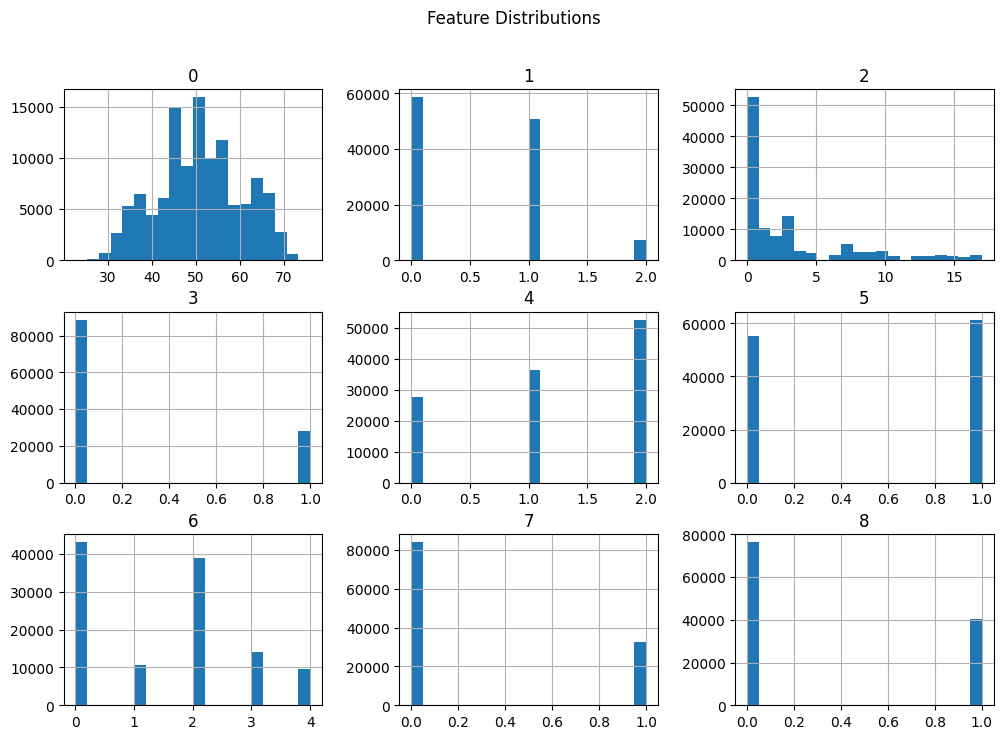

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X_df = pd.DataFrame(X)
X_df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

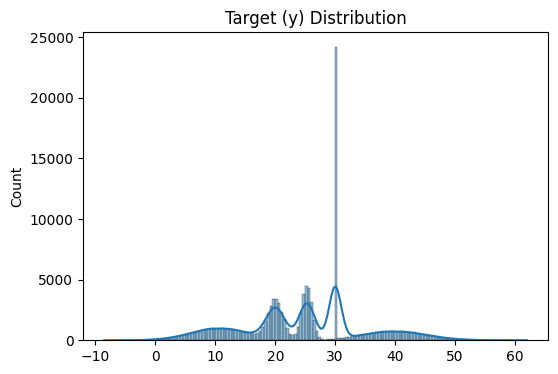

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

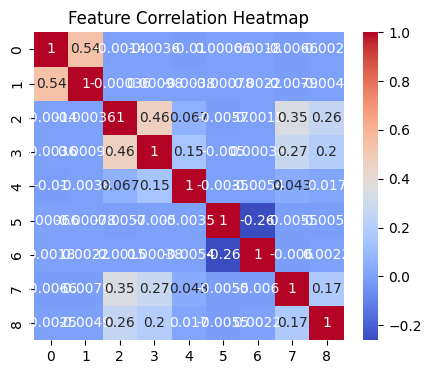

In [7]:
plt.figure(figsize=(5, 4))
corr = X_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [8]:
ndpost=1000
nskip=1000
n_trees=5

In [9]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=10, n_chains=4, ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  1.160129                 1.236838             2.633421   
1                  1.163606                 1.407431             2.605711   
2                  1.176006                 1.216154             2.700448   
3                  1.143705                 1.224822             2.492031   
4                  1.204138                 1.089573             2.489527   
5                  1.140158                 1.399948             2.412065   
6                  1.118744                 1.516860             2.012644   
7                  1.076046                 1.535608             1.920038   
8                  1.181869                 1.344741             2.708674   
9                  1.139120                 1.568243             2.530855   
mean               1.150352                 1.354022             2.450541   
std                0.035917              

In [10]:
rhat_df.to_csv("results/real5_BreastTumor_rhat.csv", index=False)

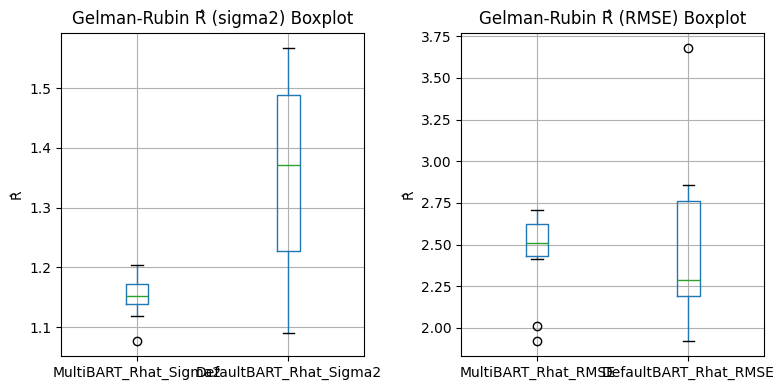

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

INFO:2025-10-08 01:21:33,159:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 01:21:33,712:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-08 01:21:34,647:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to op

test_mse:
      bart_mtmh       bart        btz          rf        xgb
0     88.657700  89.072292  90.088940  122.534528  91.816961
1     88.545740  89.389015  91.705145  124.434100  92.847232
2     88.967797  89.806862  91.703165  123.064849  92.274753
3     89.443320  89.381796  90.094320  124.127870  92.941545
4     89.753651  90.492339  91.966858  125.145147  93.192232
5     88.933266  89.479640  91.549753  124.139287  93.244948
6     89.012698  89.504491  91.632073  124.291204  92.580586
7     88.894192  90.027954  91.797096  123.591228  93.480030
8     89.518210  90.889635  92.034817  125.206971  93.032534
9     87.952481  89.886790  90.187475  124.524055  92.225059
mean  88.967905  89.793081  91.275964  124.105924  92.763588
std    0.522858   0.556679   0.808521    0.845168   0.526866



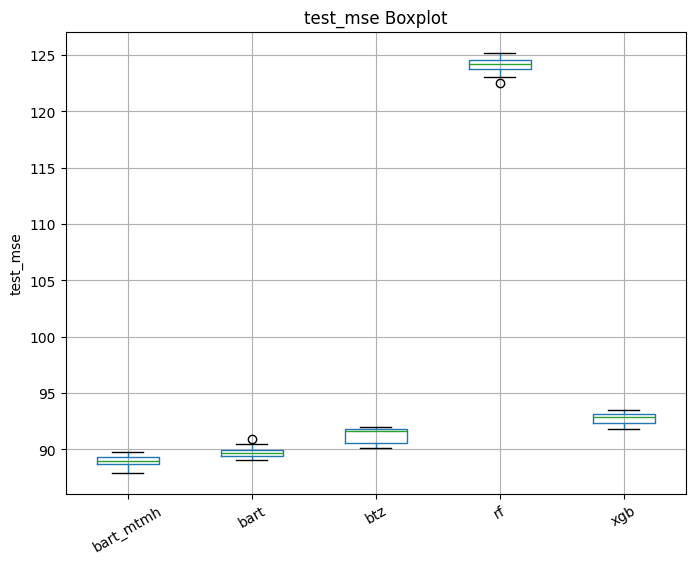

train_mse:
      bart_mtmh       bart        btz         rf        xgb
0     88.989314  89.932523  90.928648  25.343577  92.465102
1     88.761503  89.654493  91.794609  25.237736  92.816910
2     88.390419  89.476231  91.756126  25.062650  92.116341
3     88.988261  89.146182  89.713440  25.096521  92.488688
4     88.272657  88.983151  90.744135  24.912452  91.677001
5     88.409215  89.317615  91.306082  25.163388  92.595986
6     88.392432  89.280271  91.091775  25.204970  92.034783
7     88.337454  89.565009  91.108442  25.044793  92.418086
8     88.380001  89.696054  91.007987  24.932176  91.806888
9     88.406779  89.905030  90.712832  25.270398  92.666110
mean  88.532804  89.495656  91.016408  25.126866  92.308589
std    0.272533   0.314801   0.589032   0.142575   0.380097



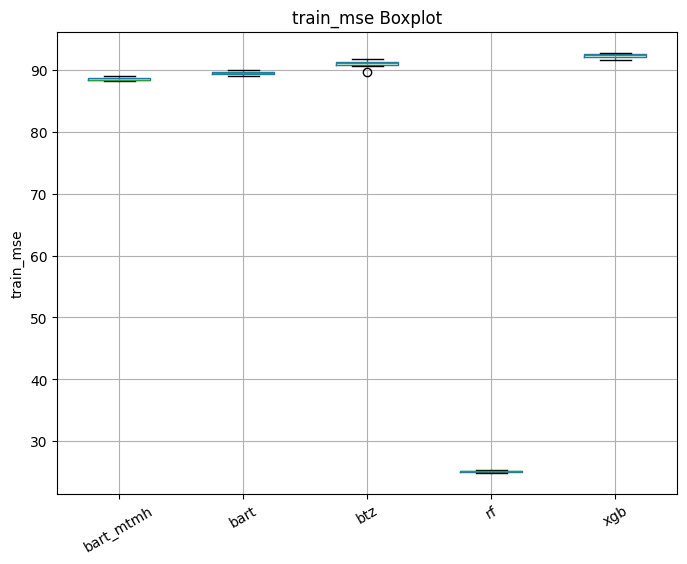

pi_length:
      bart_mtmh       bart        btz
0     36.926770  37.114192  37.526131
1     36.856202  37.074870  37.785614
2     36.773912  37.034720  37.838310
3     36.926081  36.963823  37.387379
4     36.763328  36.923761  37.678780
5     36.815527  37.034517  37.700825
6     36.786027  36.965769  37.662685
7     36.782829  37.021416  37.709526
8     36.759090  37.096016  37.626247
9     36.767616  37.101895  37.629658
mean  36.815738  37.033098  37.654518
std    0.065088   0.065354   0.127391



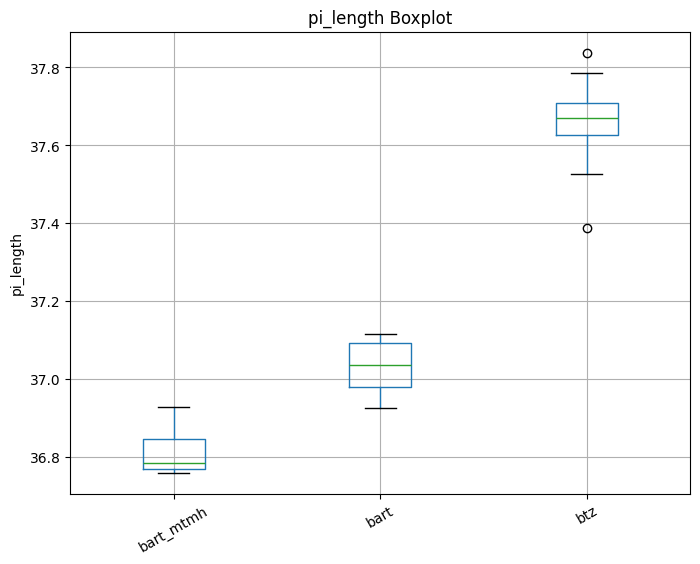

coverage:
      bart_mtmh      bart       btz
0      0.937689  0.938032  0.940638
1      0.938169  0.937517  0.940672
2      0.935871  0.936488  0.941255
3      0.937243  0.937483  0.940809
4      0.936214  0.936111  0.938649
5      0.938272  0.938957  0.941118
6      0.935802  0.936934  0.938752
7      0.938066  0.937997  0.941770
8      0.936694  0.937826  0.939609
9      0.937140  0.935974  0.940638
mean   0.937116  0.937332  0.940391
std    0.000940  0.000948  0.001048



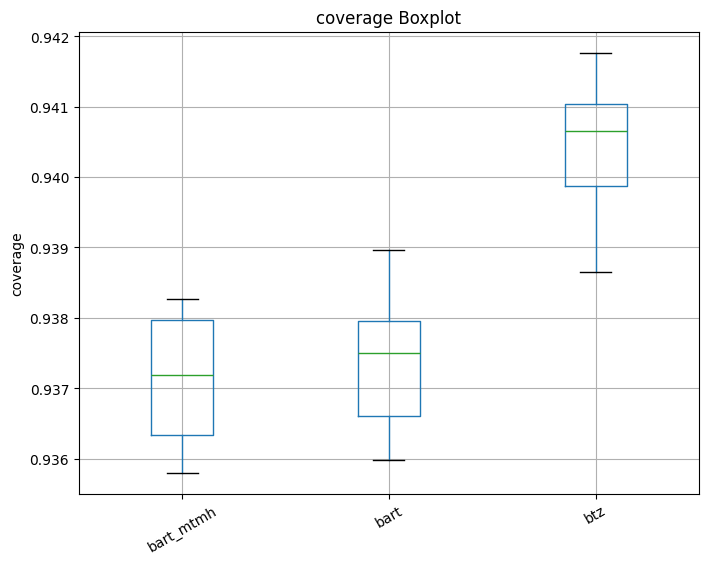

train_time:
       bart_mtmh       bart        btz        rf       xgb
0     163.534659  30.881571  42.234018  1.991161  0.176257
1     166.623093  34.449086  43.480730  1.958489  0.172492
2     150.569614  26.240875  29.942005  2.085238  0.174822
3     142.820886  26.075509  29.997905  2.084441  0.167585
4     149.299459  26.060249  28.856684  2.080451  0.190951
5     145.551326  26.305746  29.299529  2.050954  0.177704
6     152.698926  26.909239  30.468222  2.004398  0.165766
7     141.889574  26.414811  30.267757  2.069916  0.170975
8     155.115675  28.086112  33.179777  2.043487  0.170454
9     142.979272  26.862391  29.186772  1.956745  0.169630
mean  151.108248  27.828559  32.691340  2.032528  0.173664
std     8.614598   2.749459   5.495783  0.050941  0.007131



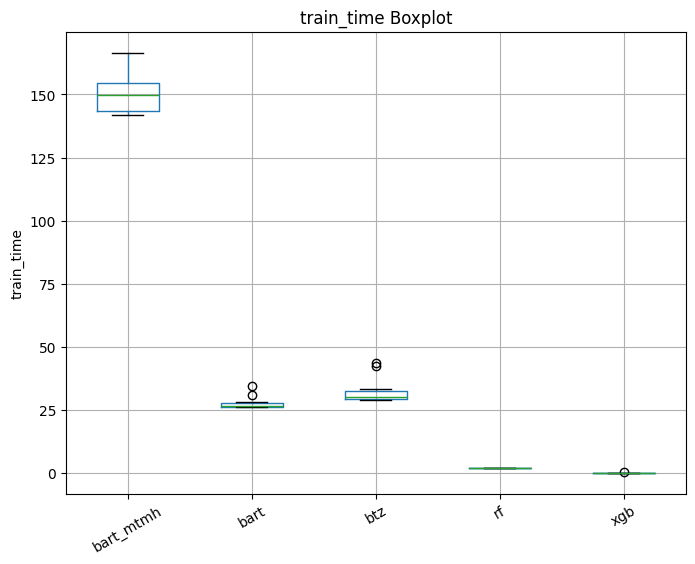

In [12]:
import matplotlib.pyplot as plt
import comparison
import pandas as pd

mse_results = comparison.bart_mse_comparison(X, y, n_runs=10, n_skip=nskip, n_post=ndpost, n_trees=n_trees, n_jobs=-2)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [13]:
for k, v in mse_results.items():
    csv_name = f"results/real5_BreastTumor_{k}.csv"
    v.to_csv(csv_name, index=False)

## Multi-tries

In [14]:
from multi_tries import multi_tries_performance
import pandas as pd

csv_path = "results/real5_BreastTumor_tries.csv"
existing_df = None

if os.path.exists(csv_path):
    existing_df = pd.read_csv(csv_path)

df = multi_tries_performance(
    X, y,
    multi_tries_list=[1, 5, 10, 50, 100],
    n_runs=10, n_chains=4,
    ndpost=ndpost, nskip=nskip, n_trees=n_trees, n_jobs=-2
)

if existing_df is not None:
    df = pd.concat([existing_df, df], ignore_index=True)
    df = df.sort_values(by='multi_tries', ascending=True).reset_index(drop=True)

df.to_csv("results/real5_BreastTumor_tries.csv", index=False)

In [15]:
print(df)

   multi_tries  Rhat_Sigma2  Rhat_RMSE   Test_MSE  Coverage   Train_Time
0            1     1.328306   2.455662  89.750737  0.937932    45.267546
1            5     1.162165   2.368062  89.297499  0.937154    89.335048
2           10     1.150352   2.450541  88.898270  0.937136   151.101887
3           50     1.078083   2.008716  88.485249  0.936776   593.919187
4          100     1.050804   2.022168  88.403567  0.936879  1113.265882
